# Chapter 2: End-to-End Machine Learning Project

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path = HOUSING_PATH):
    
    if not os.path.isdir(housing_path):
        
        os.makedirs(housing_path)
    
    tgz_path = os.path.join(housing_path,'housing.tgz')
    
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    housing_tgz = tarfile.open(tgz_path)
    
    housing_tgz.extractall(path=housing_path)
    
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH):
    
    csv_path = os.path.join(housing_path, 'housing.csv')
    
    return pd.read_csv(csv_path)

fetch_housing_data()

housing = load_housing_data()

housing.head()
    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


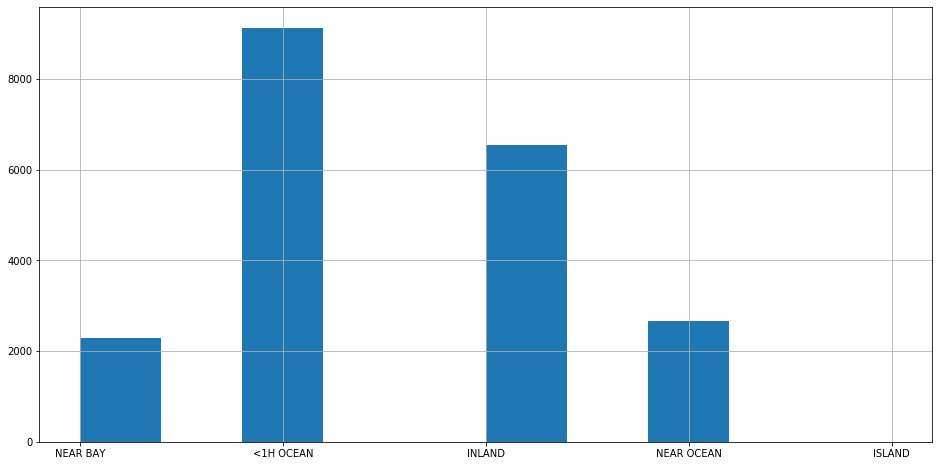

In [4]:
plt.figure(figsize=(16,8))
plt.hist(housing['ocean_proximity'])
plt.grid()

In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf895778d0>,
      dtype=object)

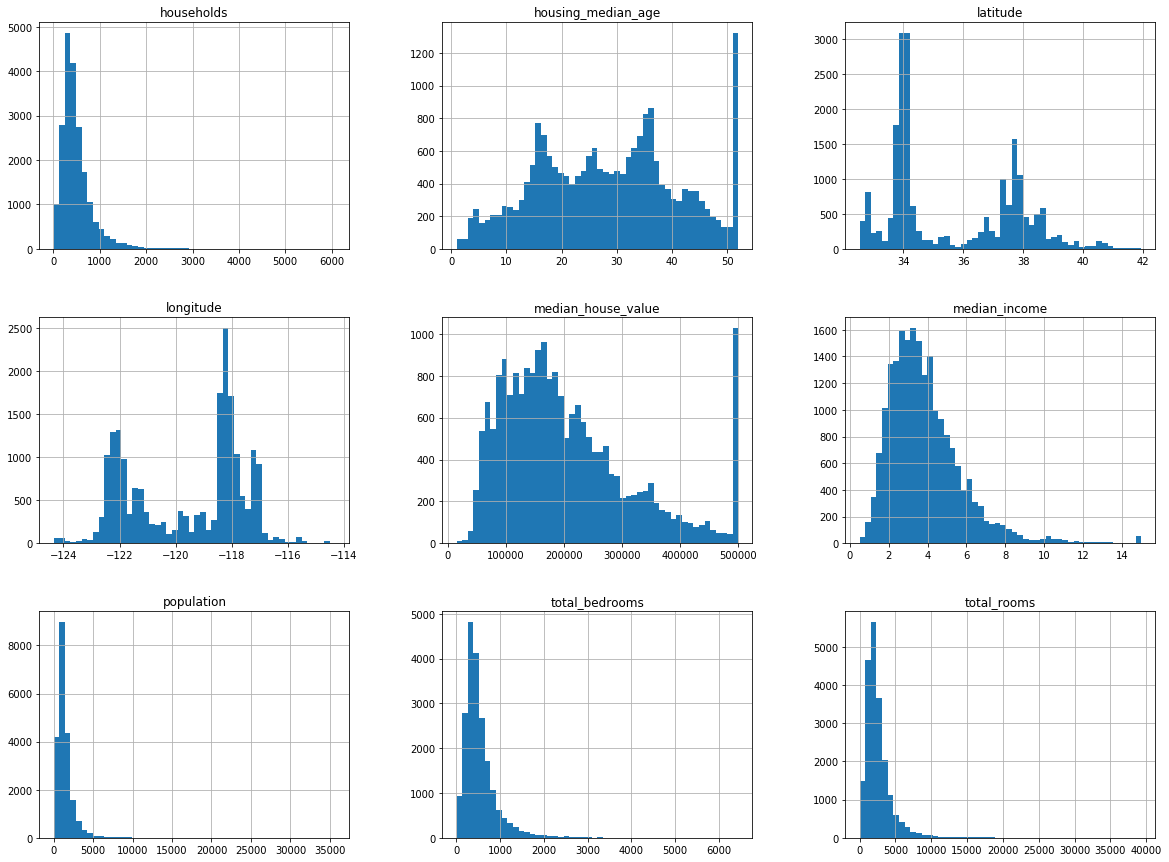

In [7]:
housing.hist(bins=50, figsize=(20,15))

In [8]:
def split_train_test(data, test_ratio):
    
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing,0.2)

print(len(train_set), "train +", len(test_set), 'test')

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)




16512 train + 4128 test


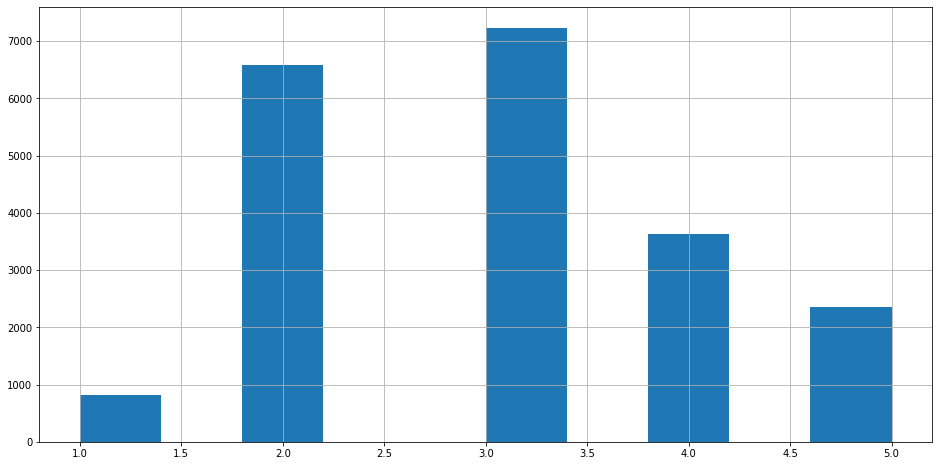

In [9]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

housing['income_cat'].where(housing['income_cat'] < 5, 5, inplace=True)

plt.figure(figsize=(16,8))
plt.hist(housing['income_cat'])
plt.grid()


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    
        strat_train_set = housing.loc[train_index]
        strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [12]:
for set_ in(strat_train_set, strat_test_set):
    
    set_.drop("income_cat",axis=1, inplace=True)
    

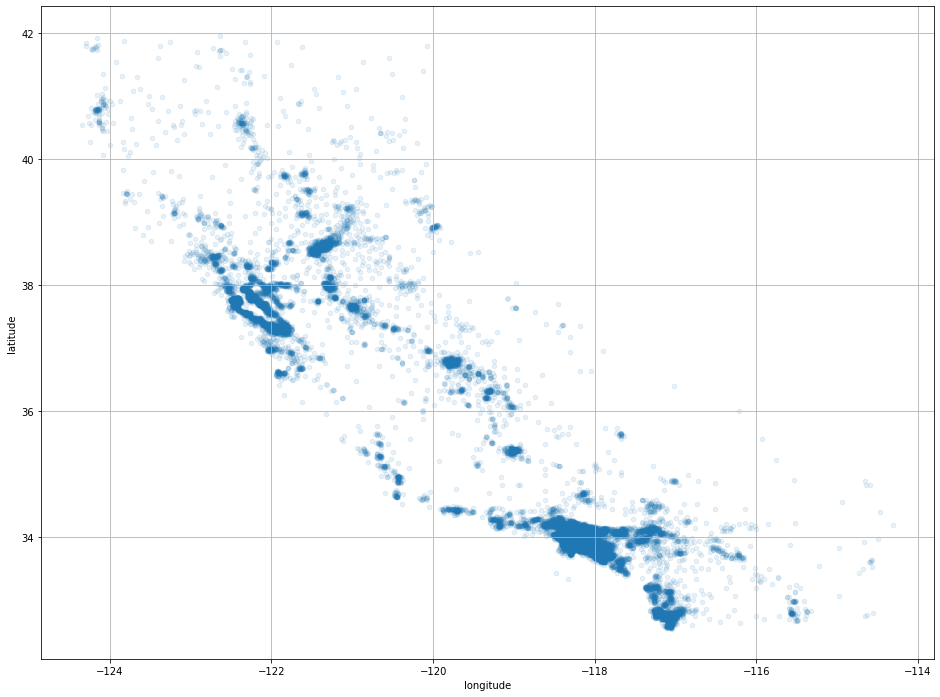

In [13]:
housing = strat_train_set.copy()

housing.plot(kind='scatter', x = 'longitude', y = 'latitude', figsize=(16,12), alpha=0.1)
plt.grid()

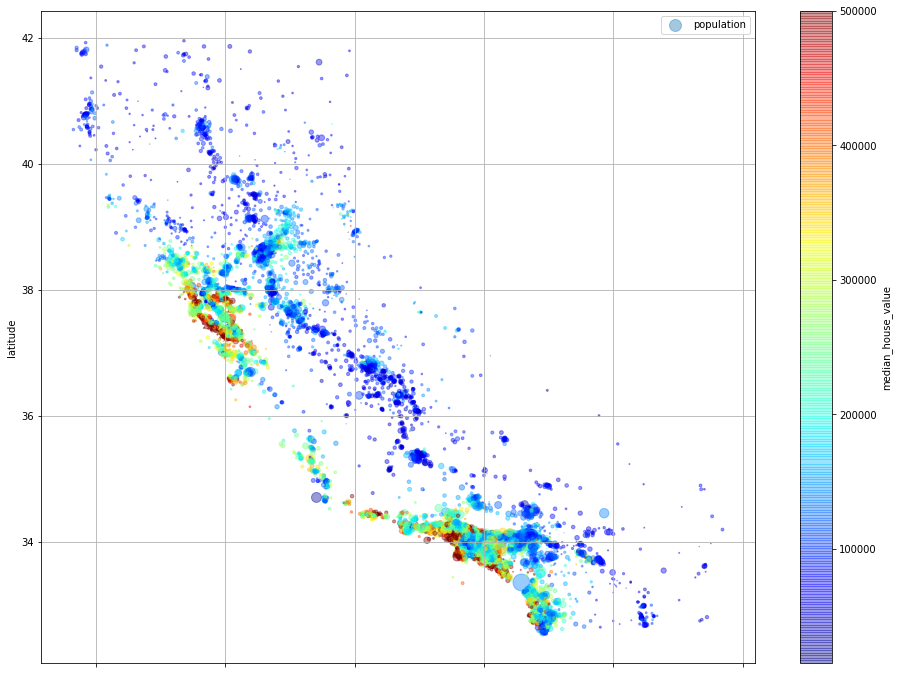

In [14]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/125, label='population', figsize=(16,12), c='median_house_value', cmap=plt.get_cmap('jet'),colorbar=True)
plt.grid()
plt.legend()


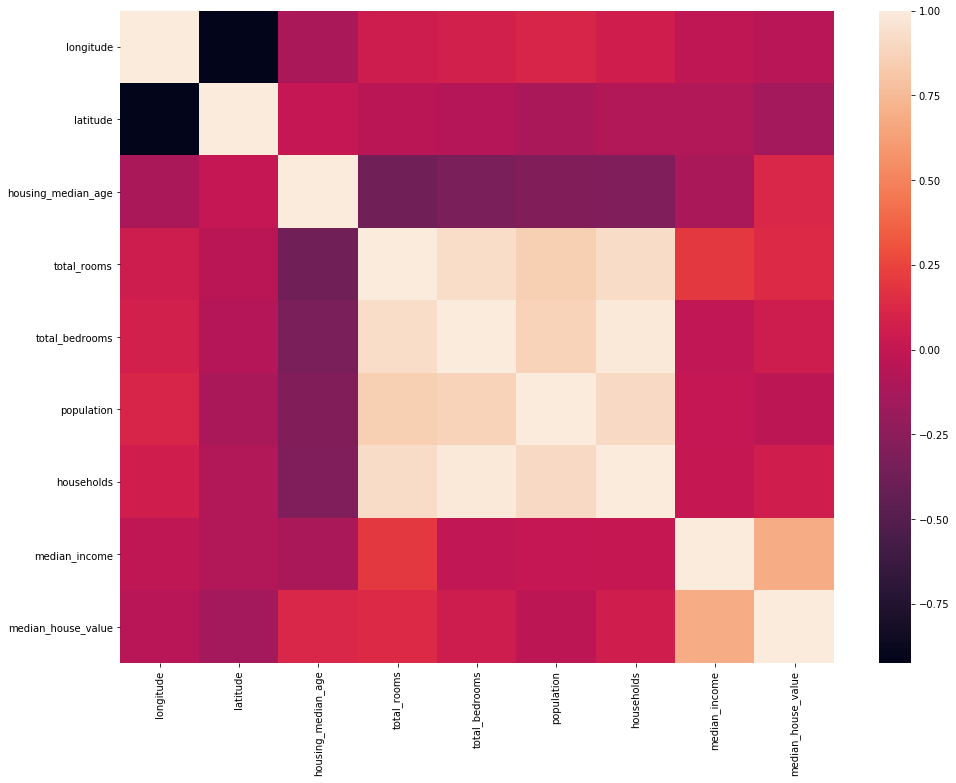

In [15]:
import seaborn as sns

corr_matrix = housing.corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix)

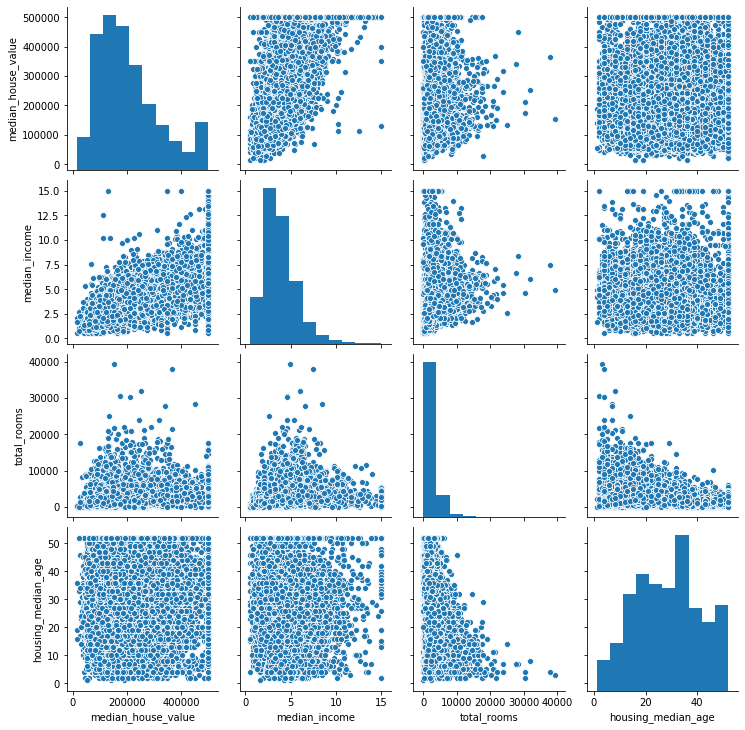

In [16]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

sns.pairplot(housing[attributes])

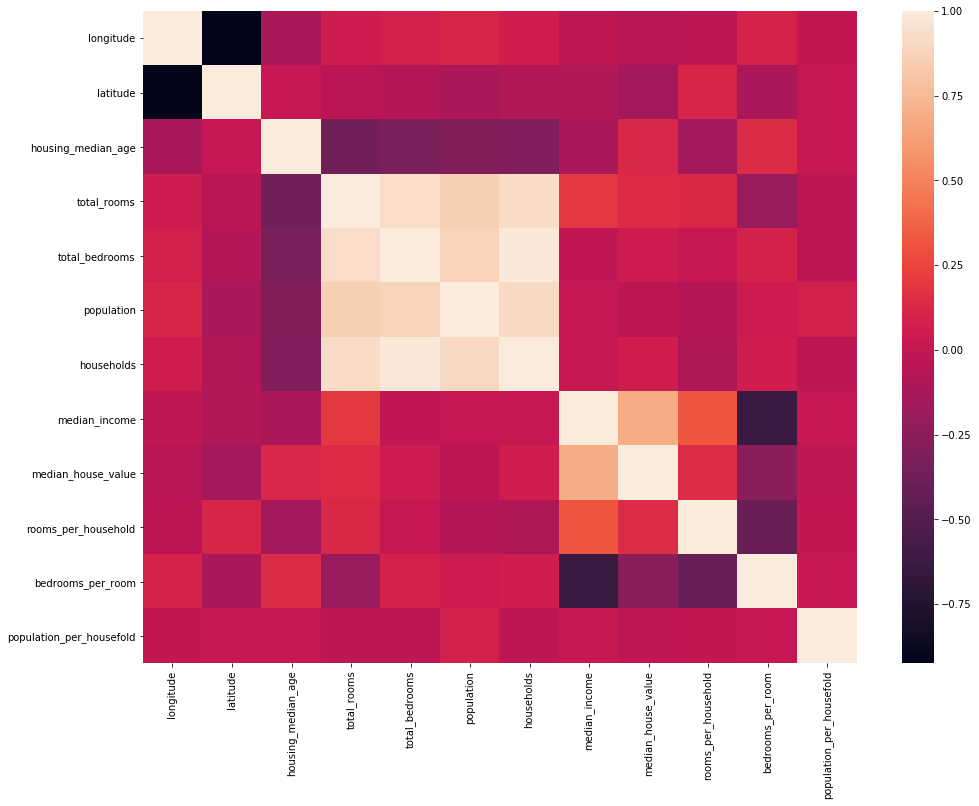

In [17]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_housefold'] = housing['population']/housing['households']

corr_matrix = housing.corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix)

In [18]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='median')

housing_num = housing.drop('ocean_proximity',axis=1)

imputer.fit(housing_num)

X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [19]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [20]:
housing_cat = housing[['ocean_proximity']]

housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [21]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [22]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [23]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self,add_bedrooms_per_room = True):
        
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X,y=None):
    
        return self
    
    def transform(self,X,y=None):
    
        rooms_per_household = X[:,rooms_ix] / X[:, households_ix]
        
        population_per_household = X[:,population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
        
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
       
housing_extra_attribs = attr_adder.transform(housing.values)
                   

In [25]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),('attribs_adder',CombinedAttributesAdder()),('std_scaler',StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [26]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [74]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),('cat',OneHotEncoder(),cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing)

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(housing_prepared, housing_labels)

LinearRegression()

In [29]:
some_data = housing.iloc[:5]

some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

lr.predict(some_data_prepared)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

In [30]:
from sklearn.metrics import mean_squared_error


predictions_lr = lr.predict(housing_prepared)

lr_mse = np.sqrt(mean_squared_error(housing_labels, predictions_lr))

lr_mse

68628.19819848923

In [31]:
from sklearn.tree import DecisionTreeRegressor

tr = DecisionTreeRegressor()

tr.fit(housing_prepared, housing_labels)

predictions_tree = tr.predict(housing_prepared)

tr_mse = np.sqrt(mean_squared_error(housing_labels, predictions_tree))

tr_mse

# Overfitted

0.0

In [32]:
from sklearn.model_selection import cross_val_score

trscores = cross_val_score(tr, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv= 10)

tree_rmse_scores = np.sqrt(-trscores)

tree_rmse_scores

array([69757.94097429, 67483.18593416, 72077.26675894, 68237.79248597,
       69956.31340879, 74302.60572148, 70863.89658473, 71998.72026789,
       76756.81281996, 70470.39747191])

In [33]:
lrscores = cross_val_score(lr, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv= 10)

lr_rmse_scores = np.sqrt(-lrscores)

lr_rmse_scores

array([66782.73843989, 66960.118071  , 70347.95244419, 74739.57052552,
       68031.13388938, 71193.84183426, 64969.63056405, 68281.61137997,
       71552.91566558, 67665.10082067])

In [34]:
from sklearn.ensemble import RandomForestRegressor

f_r = RandomForestRegressor()

f_r.fit(housing_prepared,housing_labels)

predictions_forest = f_r.predict(housing_prepared)

f_r_mse = np.sqrt(mean_squared_error(housing_labels, predictions_forest))

frscores = cross_val_score(f_r, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv= 10)

fr_rmse_scores = np.sqrt(-frscores)

fr_rmse_scores

array([49701.70599218, 47358.36357542, 49360.12940112, 52200.57419116,
       49542.76945879, 53532.62098804, 49028.01974273, 48493.1372666 ,
       53048.21194075, 50257.30432292])

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
            
            ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [79]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [37]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [38]:
cvres = grid_search.cv_results_

In [39]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    
    print(np.sqrt(-mean_score), params)

65000.45505367894 {'max_features': 2, 'n_estimators': 3}
55509.28616996191 {'max_features': 2, 'n_estimators': 10}
52823.52258884022 {'max_features': 2, 'n_estimators': 30}
60520.18280940579 {'max_features': 4, 'n_estimators': 3}
52715.10727255549 {'max_features': 4, 'n_estimators': 10}
50461.08390085551 {'max_features': 4, 'n_estimators': 30}
58986.19786794305 {'max_features': 6, 'n_estimators': 3}
52154.62938765873 {'max_features': 6, 'n_estimators': 10}
49685.93107109764 {'max_features': 6, 'n_estimators': 30}
58534.21981470613 {'max_features': 8, 'n_estimators': 3}
52456.31123292195 {'max_features': 8, 'n_estimators': 10}
50097.16952805202 {'max_features': 8, 'n_estimators': 30}
61997.067774695846 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54351.1334527354 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60126.225188436256 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52560.77049176936 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [40]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [41]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34248816904365703, 'median_income'),
 (0.13518512250013298, 'INLAND'),
 (0.1077556531323809, 'pop_per_hhold'),
 (0.08007925795564005, 'bedrooms_per_room'),
 (0.07439655908064872, 'longitude'),
 (0.07326547879445898, 'latitude'),
 (0.056958348710510434, 'rooms_per_hhold'),
 (0.042964971136669416, 'housing_median_age'),
 (0.01836505326011243, 'total_rooms'),
 (0.018074395823340243, 'population'),
 (0.017204567236809756, 'total_bedrooms'),
 (0.016277669375327222, 'households'),
 (0.010828953913482485, '<1H OCEAN'),
 (0.0033985986062436313, 'NEAR OCEAN'),
 (0.0026778271301204012, 'NEAR BAY'),
 (7.937430046522792e-05, 'ISLAND')]

In [42]:
cat_encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [43]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)

y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2



In [45]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([45775.34052846, 49647.59092284])

In [53]:
from sklearn.svm import SVR

svr = SVR()

param_grid = [
    
    {'kernel': ['linear'], 'C': [0,10,100,1000], 'gamma': ['scale','auto']},
    {'kernel': ['rbf'], 'C': [1,10,100,1000], 'gamma': ['scale','auto']},
            
            ]

grid_search_svr = GridSearchCV(svr, param_grid, cv = 3, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1,verbose=2)

grid_search_svr.fit(housing_prepared, housing_labels)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.8min finished


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0, 10, 100, 1000], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [54]:
grid_search_svr.best_params_

{'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}

In [55]:
cvres = grid_search_svr.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    
    print(np.sqrt(-mean_score), params)

nan {'C': 0, 'gamma': 'scale', 'kernel': 'linear'}
nan {'C': 0, 'gamma': 'auto', 'kernel': 'linear'}
87119.08620015063 {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
87119.08620015063 {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
71923.97409919975 {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
71923.97409919975 {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
70450.19366403716 {'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}
70450.19366403716 {'C': 1000, 'gamma': 'auto', 'kernel': 'linear'}
118700.33783086088 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
118703.26770375816 {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
116605.6261304093 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
116629.97274418767 {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
100495.464233206 {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
100399.20719137305 {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
72909.94812498326 {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
72283.19074751172 {'C': 1000, 'gamma': 'auto', 'kernel': 

In [63]:
from sklearn.model_selection import RandomizedSearchCV


param_grid = [
    
    {'kernel': ['linear'], 'C': [0,10,100,1000,5000,10000], 'gamma': ['scale','auto']},
    {'kernel': ['rbf'], 'C': [1,10,100,1000,5000,10000], 'gamma': ['scale','auto']},
            
            ]

grid_search_svr_random = RandomizedSearchCV(svr, param_grid, cv = 3, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1,verbose=2)

grid_search_svr_random.fit(housing_prepared, housing_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
                   param_distributions=[{'C': [0, 10, 100, 1000, 5000, 10000],
                                         'gamma': ['scale', 'auto'],
                                         'kernel': ['linear']},
                                        {'C': [1, 10, 100, 1000, 5000, 10000],
                                         'gamma': ['scale', 'auto'],
                                         'kernel': ['rbf']}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=2)

In [64]:
cvres = grid_search_svr_random.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    
    print(np.sqrt(-mean_score), params)

100495.464233206 {'kernel': 'rbf', 'gamma': 'scale', 'C': 100}
116629.97274418767 {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
nan {'kernel': 'linear', 'gamma': 'scale', 'C': 0}
nan {'kernel': 'linear', 'gamma': 'auto', 'C': 0}
87119.08620015063 {'kernel': 'linear', 'gamma': 'scale', 'C': 10}
70363.61850866773 {'kernel': 'linear', 'gamma': 'auto', 'C': 10000}
70450.19366403716 {'kernel': 'linear', 'gamma': 'scale', 'C': 1000}
62487.16566206975 {'kernel': 'rbf', 'gamma': 'auto', 'C': 10000}
70378.62432891982 {'kernel': 'linear', 'gamma': 'auto', 'C': 5000}
118703.26770375816 {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}


In [65]:
negative_mse = grid_search_svr.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70450.19366403716

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

def pega_indices(arr, k):
    
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature_importances, k):
        
        self.feature_importances = feature_importances
        
        self.k = k
    
    def fit(self, X, y=None):
        
        self.feature_indices_ = pega_indices(self.feature_importances, self.k)
        
        return self
    
    def transform(self, X):
        
        return X[:, self.feature_indices_]


In [69]:
top_k_feature_indices = pega_indices(feature_importances, 5)
top_k_feature_indices

array([ 0,  7,  9, 10, 12])

In [75]:
preparation_and_feature_selection_pipeline = Pipeline([

    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 5))
])

In [76]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)



In [77]:
housing_prepared_top_k_features 

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ],
       ...,
       [ 1.58648943, -0.3167053 , -0.03055414, -0.52177644,  1.        ],
       [ 0.78221312,  0.09812139,  0.06150916, -0.30340741,  0.        ],
       [-1.43579109, -0.15779865, -0.09586294,  0.10180567,  0.        ]])

In [83]:
pipeline_completo_machine_learning = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 6)),
    ('random_forest', RandomForestRegressor(**grid_search.best_params_))
])

pipeline_completo_machine_learning.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [84]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", pipeline_completo_machine_learning.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [263390.03333333 335373.33333333 221826.66666667  50860.        ]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0]
